In [1]:
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [3]:
train_df_c = train_df.copy()
test_df_c = test_df.copy()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

# Feature Engieerning

In [5]:
# First feature is is gpa_grade
# in gpa system of 5 the grading is as follows 
# 2.00- 2.74 Acceptable
# 2.75 - 3.74 Good
# 3.75 - 4.49 Very Good
# 4.5 - 5 Excellent

# in gpa system of 4 the grading is as follows 
# 1.00- 1.74 Acceptable
# 1.75 - 2.74 Good
# 2.75 - 3.49 Very Good
# 3.5 - 4 Excellent



In [6]:
def classify_gpa(score, system):
    if system == 5:
        if 2.00 <= score <= 2.74:
            return "Acceptable"
        elif 2.75 <= score <= 3.74:
            return "Good"
        elif 3.75 <= score <= 4.49:
            return "Very Good"
        elif 4.5 <= score <= 5.00:
            return "Excellent"
        else:
            return "Not Applicable"
    elif system == 4:
        if 1.00 <= score <= 1.74:
            return "Acceptable"
        elif 1.75 <= score <= 2.74:
            return "Good"
        elif 2.75 <= score <= 3.49:
            return "Very Good"
        elif 3.5 <= score <= 4.00:
            return "Excellent"
        else:
            return "Not Applicable"
    elif system == 100:
        if 60 <= score <= 69:
            return "Acceptable"
        elif 70 <= score <= 79:
            return "Good"
        elif 80 <= score <= 89:
            return "Very Good"
        elif 90 <= score <= 100:
            return "Excellent"
    else:
        return "Unknown System"

train_df_c['GPA_Grade'] = train_df_c.apply(lambda x: classify_gpa(x['University Degree Score'], x['University Degree Score System']), axis=1)

train_df_c[['University Degree Score', 'University Degree Score System', 'GPA_Grade']].head()

,University Degree Score,University Degree Score System,GPA_Grade
0,2.44,4.0,Good
1,5.00,5.0,Excellent
2,3.50,5.0,Good
3,3.55,5.0,Good
4,4.00,5.0,Very Good


In [7]:
def classify_age(age):
    if 0 <= age <= 12:
        return "Child"
    elif 13 <= age <= 19:
        return "Teen"
    elif 20 <= age <= 24:
        return "Young Adult"
    elif 25 <= age <= 34:
        return "Adult"
    elif 35 <= age <= 49:
        return "Middle Aged"
    elif 50 <= age <= 59:
        return "Pre-Senior"
    elif age >= 60:
        return "Senior"
    else:
        return "Invalid Age"

train_df_c['Age_Group'] = train_df_c.apply(lambda x: classify_age(x['Age']), axis=1)
train_df_c[['Age', 'Age_Group']]

,Age,Age_Group
0,37.0,Middle Aged
1,21.0,Young Adult
2,24.0,Young Adult
3,23.0,Young Adult
4,23.0,Young Adult
...,...,...
6543,31.0,Adult
6544,27.0,Adult
6545,24.0,Young Adult
6546,25.0,Adult


## How ***far*** each city is from riyadh is
## that could play a big factor

In [8]:
unq_cites=train_df["Home City"].unique()
len(unq_cites)

93

# Encoding 

In [9]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y', 'GPA_Grade',
       'Age_Group'],
      dtype='object')

In [10]:
# le = LabelEncoder()
# categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
#                         'Program Main Category Code', 'Program Sub Category Code', 
#                         'Technology Type', 'Program Skill Level', 
#                         'Program Presentation Method', 'Completed Degree', 
#                         'Level of Education', 'Education Speaciality', 'College', 
#                         'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade"]

# for feature in categorical_features:
#     train_df_c[feature] = le.fit_transform(train_df_c[feature])


In [11]:
train_df_c.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,Age_Group
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0,Good,Middle Aged
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0,Excellent,Young Adult
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0,Good,Young Adult
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0,Good,Young Adult
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0,Very Good,Young Adult


# Analysis after encoding

In [12]:
train_df_c

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,Age_Group
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0,Good,Middle Aged
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0,Excellent,Young Adult
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0,Good,Young Adult
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0,Good,Young Adult
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0,Very Good,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0,Very Good,Adult
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0,Very Good,Adult
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1,Excellent,Young Adult
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0,Excellent,Adult


In [13]:
gpa = train_df_c.groupby(["University Degree Score","Y"])
gpa

<Axes: >

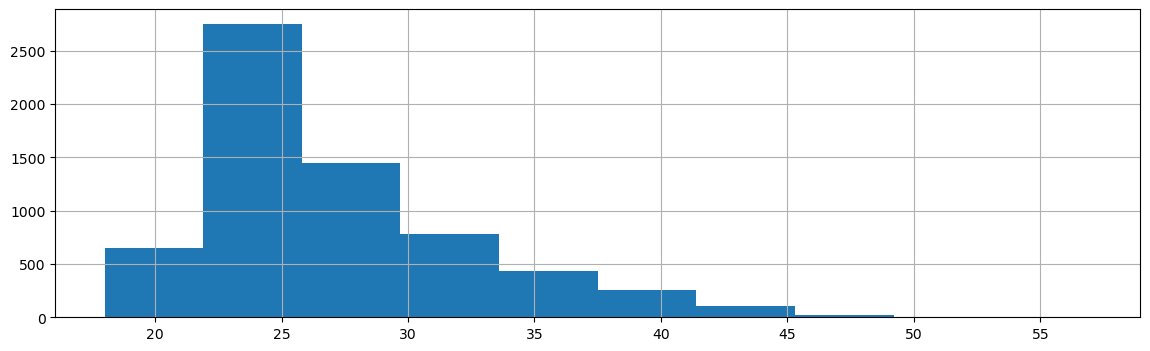

In [14]:
train_df['Age'].hist(figsize=(14,4))

# Splitting Dataset

## Split train data into validation and training datasets

In [15]:
X = train_df_c.drop(["Y","Program End Date","Program Start Date"],axis=1)
y = train_df_c["Y"]


In [16]:
X.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,GPA_Grade,Age_Group
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,Good,Middle Aged
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,Excellent,Young Adult
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,Good,Young Adult
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,Good,Young Adult
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,Very Good,Young Adult


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


In [18]:
X_train.shape

(6220, 23)

In [19]:
X_test.shape

(328, 23)

In [20]:
le = LabelEncoder()
categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
                        'Program Main Category Code', 'Program Sub Category Code', 
                        'Technology Type', 'Program Skill Level', 
                        'Program Presentation Method', 'Completed Degree', 
                        'Level of Education', 'Education Speaciality', 'College', 
                        'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade", "Age_Group"]

for feature in categorical_features:
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.fit_transform(X_test[feature])

# Modeling

In [35]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 35,
    'learning_rate': 0.0252,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
}


gbm = lgb.train(params,
                train_data,
                num_boost_round=150,
                valid_sets=[train_data, test_data],
                valid_names=['train', 'eval'])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert probabilities to binary predictions assuming 0.5 threshold
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)  # Note: use y_pred directly as it expects probabilities

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 991, number of negative: 5229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 6220, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159325 -> initscore=-1.663261
[LightGBM] [Info] Start training from score -1.663261
Accuracy: 0.90
Precision: 0.74
Recall: 0.48
F1 Score: 0.58
ROC AUC: 0.87


In [37]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Configure the LightGBM classifier
# Note: Adjust these parameters based on your specific needs and dataset characteristics
clf = lgb.LGBMClassifier(
    objective='binary',
    num_leaves=35,
    learning_rate=0.0252,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=3,
    metric='binary_logloss',
    random_state=42,
)

# Perform cross-validation
# cv: number of folds, scoring: metric for evaluation
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X_train, y_train, cv=k_folds)

# Print results
print(f'CV scores for each fold: {scores}')
print(f'Mean CV: {np.mean(scores)}')


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 809, number of negative: 4167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_col_wise=true` to remove the ov

In [23]:
# X_train.columns
# clf.score(X_train, y_train)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)



ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
# from lightgbm import gbm

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 7, 9],
    'learning_rate': [0.01, 0.2, 0.45],
    'subsample': [0.65, 0.85, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.1, 0.3, 0.5],
    'reg_lambda': [0.01, 0.1, 1.0],
    'reg_alpha': [0.01, 0.1, 1.0]
}

# Instantiate the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform grid search or randomized search
grid_search = GridSearchCV(xgb_model, param_grid, cv=7, scoring='roc_auc', n_jobs=-1)
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=7, scoring='roc_auc', n_jobs=-1)

# Fit the grid/random search
grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params, best_model)

{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 9, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 0.85} XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)

accuracy_percentage = accuracy * 100

print(f"accuracy : {accuracy_percentage:.2f}%")


accuracy : 90.85%


In [ ]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y', 'GPA_Grade'],
      dtype='object')

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")


F1 Score: 0.68
Recall: 0.67
Precision: 0.70
Accuracy: 0.91
